In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 10
%matplotlib inline

In [2]:
np.random.seed(420)
N_trials = 20
N_time = 500



## Theory: switching motion


In [3]:
tau = 100.

def binomial_motion(N_time, N_trials, tau):
    time = np.arange(N_time)
    p = np.random.rand(N_time, N_trials)
    for i_time in time[1:]:
        switch = np.random.rand(1, N_trials) < 1/tau
        p[i_time, :] = (1 - switch)*p[i_time-1, :] + switch * np.random.rand(1, N_trials)
    return (time, p)

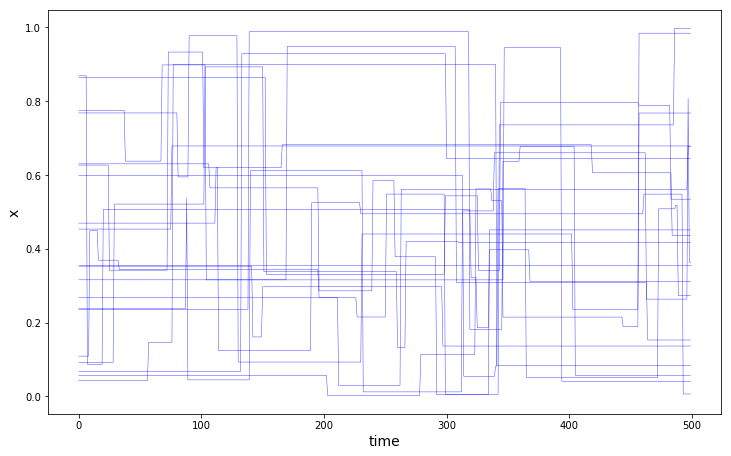

In [4]:
time, p = binomial_motion(N_time, N_trials, tau)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, p, c='b', lw=.5, alpha=.7)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('x', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);

Sample 13


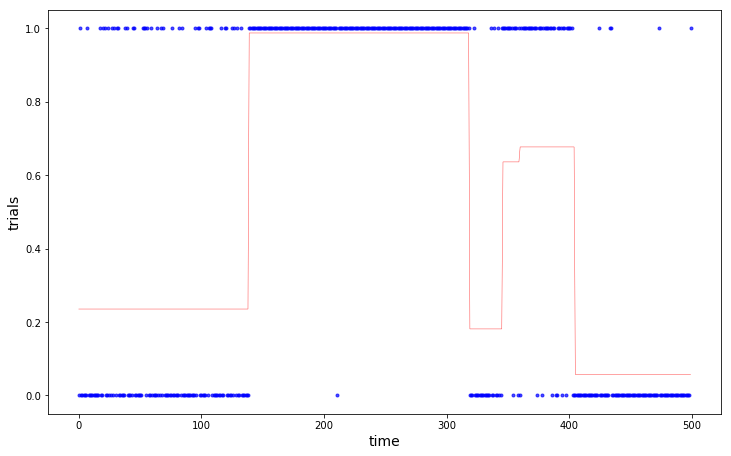

In [5]:
bernouilli =  p > np.random.rand(N_time, N_trials)
i_sample = np.random.randint(N_trials)
print('Sample', i_sample)
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180))
_ = ax.plot(time, bernouilli[:, i_sample], '.',  c='b', lw=.5, alpha=.7)
_ = ax.plot(time, p[:, i_sample], c='r', lw=.5, alpha=.7)
fig.tight_layout()
ax.axis('tight')
ax.set_ylabel('trials', fontsize=14)
#ax.set_ylim(-.05, 1.05)
ax.set_xlabel('time', fontsize=14);